In [1]:
#To Supress unnecessary warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing necessary packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.feature_selection import SelectFromModel

# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [3]:
# Read the dataset
from IPython.display import display
pd.options.display.max_columns = None
data_df=pd.read_csv("train.csv")

In [4]:
#Looking at the first few rows of the data set
data_df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [5]:
# Inspecting the shape of the dataset
data_df.shape

(1460, 81)

In [6]:
# Inspect the columns of the dataset
data_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [7]:
# Checking the summary of the dataset
data_df.describe(include='all')

Id   MSSubClass MSZoning  LotFrontage        LotArea Street  \
count   1460.000000  1460.000000     1460  1201.000000    1460.000000   1460   
unique          NaN          NaN        5          NaN            NaN      2   
top             NaN          NaN       RL          NaN            NaN   Pave   
freq            NaN          NaN     1151          NaN            NaN   1454   
mean     730.500000    56.897260      NaN    70.049958   10516.828082    NaN   
std      421.610009    42.300571      NaN    24.284752    9981.264932    NaN   
min        1.000000    20.000000      NaN    21.000000    1300.000000    NaN   
25%      365.750000    20.000000      NaN    59.000000    7553.500000    NaN   
50%      730.500000    50.000000      NaN    69.000000    9478.500000    NaN   
75%     1095.250000    70.000000      NaN    80.000000   11601.500000    NaN   
max     1460.000000   190.000000      NaN   313.000000  215245.000000    NaN   

       Alley LotShape LandContour Utilities LotConfig LandSlope Neighborhood  \
count     91     1460        1460      1460      1460      1460         1460   
unique     2        4           4         2         5         3           25   
top     Grvl      Reg         Lvl    AllPub    Inside       Gtl        NAmes   
freq      50      925        1311      1459      1052      1382          225   
mean     NaN      NaN         NaN       NaN       NaN       NaN          NaN   
std      NaN      NaN         NaN       NaN       NaN       NaN          NaN   
min      NaN      NaN         NaN       NaN       NaN       NaN          NaN   
25%      NaN      NaN         NaN       NaN       NaN       NaN          NaN   
50%      NaN      NaN         NaN       NaN       NaN       NaN          NaN   
75%      NaN      NaN         NaN       NaN       NaN       NaN          NaN   
max      NaN      NaN         NaN       NaN       NaN       NaN          NaN   

       Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  \
count        1460       1460     1460       1460  1460.000000  1460.000000   
unique          9          8        5          8          NaN          NaN   
top          Norm       Norm     1Fam     1Story          NaN          NaN   
freq         1260       1445     1220        726          NaN          NaN   
mean          NaN        NaN      NaN        NaN     6.099315     5.575342   
std           NaN        NaN      NaN        NaN     1.382997     1.112799   
min           NaN        NaN      NaN        NaN     1.000000     1.000000   
25%           NaN        NaN      NaN        NaN     5.000000     5.000000   
50%           NaN        NaN      NaN        NaN     6.000000     5.000000   
75%           NaN        NaN      NaN        NaN     7.000000     6.000000   
max           NaN        NaN      NaN        NaN    10.000000     9.000000   

          YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd  \
count   1460.000000   1460.000000      1460     1460        1460        1460   
unique          NaN           NaN         6        8          15          16   
top             NaN           NaN     Gable  CompShg     VinylSd     VinylSd   
freq            NaN           NaN      1141     1434         515         504   
mean    1971.267808   1984.865753       NaN      NaN         NaN         NaN   
std       30.202904     20.645407       NaN      NaN         NaN         NaN   
min     1872.000000   1950.000000       NaN      NaN         NaN         NaN   
25%     1954.000000   1967.000000       NaN      NaN         NaN         NaN   
50%     1973.000000   1994.000000       NaN      NaN         NaN         NaN   
75%     2000.000000   2004.000000       NaN      NaN         NaN         NaN   
max     2010.000000   2010.000000       NaN      NaN         NaN         NaN   

       MasVnrType   MasVnrArea ExterQual ExterCond Foundation BsmtQual  \
count        1452  1452.000000      1460      1460       1460     1423   
unique          4          NaN         4         

In [8]:
# Check the info to see the types of the feature variables and the null values present

data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### Data Cleaning and Preparation

#### Missing Value analysis and Imputation

In [9]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [10]:
# Count of missing values in each column
data_df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [11]:
# Percentage of missing values in each column
(data_df.isnull().sum()/data_df.shape[0]*100).sort_values(ascending=False)

PoolQC           99.520548
MiscFeature      96.301370
Alley            93.767123
Fence            80.753425
FireplaceQu      47.260274
LotFrontage      17.739726
GarageCond        5.547945
GarageType        5.547945
GarageYrBlt       5.547945
GarageFinish      5.547945
GarageQual        5.547945
BsmtExposure      2.602740
BsmtFinType2      2.602740
BsmtFinType1      2.534247
BsmtCond          2.534247
BsmtQual          2.534247
MasVnrArea        0.547945
MasVnrType        0.547945
Electrical        0.068493
Utilities         0.000000
YearRemodAdd      0.000000
MSSubClass        0.000000
Foundation        0.000000
ExterCond         0.000000
ExterQual         0.000000
Exterior2nd       0.000000
Exterior1st       0.000000
RoofMatl          0.000000
RoofStyle         0.000000
YearBuilt         0.000000
LotConfig         0.000000
OverallCond       0.000000
OverallQual       0.000000
HouseStyle        0.000000
BldgType          0.000000
Condition2        0.000000
BsmtFinSF1        0.000000
M

- There are many columns which has high number of missing values  
- If missing value percentage is more in a column, that would not help us much in data analysis
- Dropping of columns with missing value percentage more than 85%

In [12]:
# Dropping the columns which has hightest number of missing values
data_df = data_df.drop(['PoolQC','MiscFeature','Alley','FireplaceQu','Fence'],axis='columns')

In [13]:
(data_df.isnull().sum()/data_df.shape[0]*100).sort_values(ascending=False).head(15)

LotFrontage     17.739726
GarageFinish     5.547945
GarageType       5.547945
GarageCond       5.547945
GarageQual       5.547945
GarageYrBlt      5.547945
BsmtExposure     2.602740
BsmtFinType2     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrType       0.547945
MasVnrArea       0.547945
Electrical       0.068493
RoofStyle        0.000000
dtype: float64

In [14]:
# Checking the null values in Garage columns
data_df[['GarageType','GarageYrBlt','GarageFinish','GarageCond','GarageQual']].isnull().sum()

GarageType      81
GarageYrBlt     81
GarageFinish    81
GarageCond      81
GarageQual      81
dtype: int64

Noticed that these are same rows which are presesnt as NA in all the garage related columns. These are not just missing values instead it has specific meaning. From the data dictionary we know that these are the buildings with no Garage in it.
Hence replacing this with "None"

In [15]:
for col in ('GarageType','GarageFinish','GarageCond','GarageQual'):
    data_df[col]=data_df[col].fillna('None')
    
data_df['GarageYrBlt']=data_df['GarageYrBlt'].fillna(0)
data_df['GarageYrBlt'] = data_df['GarageYrBlt'].astype("int64")
    
#Checking the replaced values 
data_df[['GarageType','GarageYrBlt','GarageFinish','GarageCond','GarageQual']].isnull().sum()    

GarageType      0
GarageYrBlt     0
GarageFinish    0
GarageCond      0
GarageQual      0
dtype: int64

In [16]:
# Similarly for all other categorical columns we would replace the values with None
for col in ('BsmtFinType2','BsmtExposure','BsmtQual','BsmtFinType1','BsmtCond','MasVnrType','Electrical'):
    data_df[col]=data_df[col].fillna('None')

In [17]:
# Since the column MasVnrArea and LotFrontage has very less missing values imputing it with mean value
data_df.MasVnrArea.fillna(data_df.MasVnrArea.mean(),inplace=True)
data_df.LotFrontage.fillna(data_df.LotFrontage.mean(),inplace=True)

In [18]:
# Checking the missing values again
(data_df.isnull().sum()/data_df.shape[0]*100).sort_values(ascending=False).head(15)

SalePrice        0.0
ExterCond        0.0
RoofStyle        0.0
RoofMatl         0.0
Exterior1st      0.0
Exterior2nd      0.0
MasVnrType       0.0
MasVnrArea       0.0
ExterQual        0.0
Foundation       0.0
SaleCondition    0.0
BsmtQual         0.0
BsmtCond         0.0
BsmtExposure     0.0
BsmtFinType1     0.0
dtype: float64

In [19]:
# ID column has no use for us hence removing that column
data_df = data_df.drop(['Id'],axis='columns')

In [20]:
# Checking the categorical columns which has value counts of 85%
def CategoricalColumnValueCounts():
    column = []
    categorical_column = data_df.select_dtypes(include=['object'])
    for cols in (categorical_column):
        if(data_df[cols].value_counts().max() >= 1241):
            column.append(cols)
    return column

columns_max_count = CategoricalColumnValueCounts()
columns_max_count

['Street',
 'LandContour',
 'Utilities',
 'LandSlope',
 'Condition1',
 'Condition2',
 'RoofMatl',
 'ExterCond',
 'BsmtCond',
 'BsmtFinType2',
 'Heating',
 'CentralAir',
 'Electrical',
 'Functional',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType']

In [21]:
# Dropping these columns since majority of the values are same in these columns
data_df.drop(columns_max_count, axis = 1, inplace = True)
data_df.shape

(1460, 57)

In [22]:
# Checking the numerical columns which has value counts of 85%
def NumericalValueCounts():
    column = []
    numerical_columns = data_df.select_dtypes(include=['int64', 'float'])
    for col in (numerical_columns):
        if(data_df[col].value_counts().max() >= 1241):
            column.append(col)
    return column

Ncolumns_max_count = NumericalValueCounts()
Ncolumns_max_count

['BsmtFinSF2',
 'LowQualFinSF',
 'BsmtHalfBath',
 'KitchenAbvGr',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal']

In [23]:
# Dropping the Numerical coulmns which have 85% values similar 
data_df.drop(Ncolumns_max_count, axis = 1, inplace = True)

# Dropping Month Sold column "MoSold" which is of not much use for our analysis
data_df.drop(['MoSold'], axis = 1, inplace = True)

data_df.head()

MSSubClass MSZoning  LotFrontage  LotArea LotShape LotConfig Neighborhood  \
0          60       RL         65.0     8450      Reg    Inside      CollgCr   
1          20       RL         80.0     9600      Reg       FR2      Veenker   
2          60       RL         68.0    11250      IR1    Inside      CollgCr   
3          70       RL         60.0     9550      IR1    Corner      Crawfor   
4          60       RL         84.0    14260      IR1       FR2      NoRidge   

  BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0     1Fam     2Story            7            5       2003          2003   
1     1Fam     1Story            6            8       1976          1976   
2     1Fam     2Story            7            5       2001          2002   
3     1Fam     2Story            7            5       1915          1970   
4     1Fam     2Story            8            5       2000          2000   

  RoofStyle Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual  \
0     Gable     VinylSd     VinylSd    BrkFace       196.0        Gd   
1     Gable     MetalSd     MetalSd       None         0.0        TA   
2     Gable     VinylSd     VinylSd    BrkFace       162.0        Gd   
3     Gable     Wd Sdng     Wd Shng       None         0.0        TA   
4     Gable     VinylSd     VinylSd    BrkFace       350.0        Gd   

  Foundation BsmtQual BsmtExposure BsmtFinType1  BsmtFinSF1  BsmtUnfSF  \
0      PConc       Gd           No          GLQ         706        150   
1     CBlock       Gd           Gd          ALQ         978        284   
2      PConc       Gd           Mn          GLQ         486        434   
3     BrkTil       TA           No          ALQ         216        540   
4      PConc       Gd           Av          GLQ         655        490   

   TotalBsmtSF HeatingQC  1stFlrSF  2ndFlrSF  GrLivArea  BsmtFullBath  \
0          856        Ex       856       854       1710             1   
1         1262        Ex      1262         0       1262             0   
2          920        Ex       920       866       1786             1   
3          756        Gd       961       756       1717             1   
4         1145        Ex      1145      1053       2198             1   

   FullBath  HalfBath  BedroomAbvGr KitchenQual  TotRmsAbvGrd  Fireplaces  \
0         2         1             3          Gd             8           0   
1         2         0             3          TA             6           1   
2         2         1             3          Gd             6           1   
3         1         0             3          Gd             7           1   
4         2         1             4          Gd             9           1   

  GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea  WoodDeckSF  \
0     Attchd         2003          RFn           2         548           0   
1     Attchd         1976          RFn           2         460         298   
2     Attchd         2001          RFn           2         608           0   
3     Detchd         1998          Unf           3         642           0   
4     Attchd         2000          RFn           3         836         192   

   OpenPorchSF  YrSold SaleCondition  SalePrice  
0           61    2008        Normal     208500  
1            0    2007        Normal     181500  
2           42    2008        Normal     223500  
3           35    2006       Abnorml     140000  
4           84    2008        Normal     250000

In [24]:
#Deriving age from date columns present
from datetime import date
current_date = date.today()
data_df['YearBuilt_New'] = current_date.year-data_df.YearBuilt
data_df['YearRemodAdd_New'] = current_date.year-data_df.YearRemodAdd
data_df['YrSold_New'] = current_date.year-data_df.YrSold

def garage_age(year):
    if year == 0:
        return 0
    else :
        return current_date.year - year

data_df['GarageYrBlt_New'] = data_df["GarageYrBlt"].apply(func = garage_age)

data_df[['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold','YearBuilt_New','YearRemodAdd_New','GarageYrBlt_New','YrSold_New']]

YearBuilt  YearRemodAdd  GarageYrBlt  YrSold  YearBuilt_New  \
0          2003          2003         2003    2008             18   
1          1976          1976         1976    2007             45   
2          2001          2002         2001    2008             20   
3          1915          1970         1998    2006            106   
4          2000          2000         2000    2008             21   
5          1993          1995         1993    2009             28   
6          2004          2005         2004    2007             17   
7          1973          1973         1973    2009             48   
8          1931          1950         1931    2008             90   
9          1939          1950         1939    2008             82   
10         1965          1965         1965    2008             56   
11         2005          2006         2005    2006             16   
12         1962          1962         1962    2008             59   
13         2006          2007         2006    2007             15   
14         1960          1960         1960    2008             61   
15         1929          2001         1991    2007             92   
16         1970          1970         1970    2010             51   
17         1967          1967         1967    2006             54   
18         2004          2004         2004    2008             17   
19         1958          1965         1958    2009             63   
20         2005          2006         2005    2006             16   
21         1930          1950         1930    2007             91   
22         2002          2002         2002    2008             19   
23         1976          1976         1976    2007             45   
24         1968          2001         1968    2010             53   
25         2007          2007         2007    2009             14   
26         1951          2000         2005    2010             70   
27         2007          2008         2008    2010             14   
28         1957          1997         1957    2006             64   
29         1927          1950         1920    2008             94   
30         1920          1950         1920    2008            101   
31         1966          2006         1966    2008             55   
32         2007          2007         2007    2008             14   
33         1959          1959         1959    2010             62   
34         2005          2005         2005    2007             16   
35         2004          2005         2004    2006             17   
36         1994          1995         1995    2009             27   
37         1954          1990         1954    2009             67   
38         1953          2007         1953    2010             68   
39         1955          1955            0    2008             66   
40         1965          1965         1965    2006             56   
41         1959          1959         1959    2007             62   
42         1983          1983         1983    2007             38   
43         1975          1980         1977    2008             46   
44         1959          1959         1959    2006             62   
45         2005          2005         2005    2010             16   
46         2003          2003         2003    2009             18   
47         2006          2006         2006    2007             15   
48         1920          2008            0    2009            101   
49         1966          1966         1966    2007             55   
50         1997          1997         1997    2007             24   
51         1934          1950         1985    2006             87   
52         1963          1963         1963    2010             58   
53         1981          1987         1981    2006             40   
54         1955          1955         1962    2007             66   
55         1964          1964         1964    2008             57   
56         1999          2000         1999    2009             22   
57  

In [25]:
# Dropping the original Columns
data_df = data_df.drop(['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold'],axis='columns')
data_df

MSSubClass MSZoning  LotFrontage  LotArea LotShape LotConfig  \
0             60       RL    65.000000     8450      Reg    Inside   
1             20       RL    80.000000     9600      Reg       FR2   
2             60       RL    68.000000    11250      IR1    Inside   
3             70       RL    60.000000     9550      IR1    Corner   
4             60       RL    84.000000    14260      IR1       FR2   
5             50       RL    85.000000    14115      IR1    Inside   
6             20       RL    75.000000    10084      Reg    Inside   
7             60       RL    70.049958    10382      IR1    Corner   
8             50       RM    51.000000     6120      Reg    Inside   
9            190       RL    50.000000     7420      Reg    Corner   
10            20       RL    70.000000    11200      Reg    Inside   
11            60       RL    85.000000    11924      IR1    Inside   
12            20       RL    70.049958    12968      IR2    Inside   
13            20       RL    91.000000    10652      IR1    Inside   
14            20       RL    70.049958    10920      IR1    Corner   
15            45       RM    51.000000     6120      Reg    Corner   
16            20       RL    70.049958    11241      IR1   CulDSac   
17            90       RL    72.000000    10791      Reg    Inside   
18            20       RL    66.000000    13695      Reg    Inside   
19            20       RL    70.000000     7560      Reg    Inside   
20            60       RL   101.000000    14215      IR1    Corner   
21            45       RM    57.000000     7449      Reg    Inside   
22            20       RL    75.000000     9742      Reg    Inside   
23           120       RM    44.000000     4224      Reg    Inside   
24            20       RL    70.049958     8246      IR1    Inside   
25            20       RL   110.000000    14230      Reg    Corner   
26            20       RL    60.000000     7200      Reg    Corner   
27            20       RL    98.000000    11478      Reg    Inside   
28            20       RL    47.000000    16321      IR1   CulDSac   
29            30       RM    60.000000     6324      IR1    Inside   
30            70  C (all)    50.000000     8500      Reg    Inside   
31            20       RL    70.049958     8544      IR1   CulDSac   
32            20       RL    85.000000    11049      Reg    Corner   
33            20       RL    70.000000    10552      IR1    Inside   
34           120       RL    60.000000     7313      Reg    Inside   
35            60       RL   108.000000    13418      Reg    Inside   
36            20       RL   112.000000    10859      Reg    Corner   
37            20       RL    74.000000     8532      Reg    Inside   
38            20       RL    68.000000     7922      Reg    Inside   
39            90       RL    65.000000     6040      Reg    Inside   
40            20       RL    84.000000     8658      Reg    Inside   
41            20       RL   115.000000    16905      Reg    Inside   
42            85       RL    70.049958     9180      IR1   CulDSac   
43            20       RL    70.049958     9200      IR1   CulDSac   
44            20       RL    70.000000     7945      Reg    Inside   
45           120       RL    61.000000     7658      Reg    Inside   
46            50       RL    48.000000    12822      IR1   CulDSac   
47            20       FV    84.000000    11096      Reg    Inside   
48           190       RM    33.000000     4456      Reg    Inside   
49            20       RL    66.000000     7742      Reg    Inside   
50            60       RL    70.049958    13869      IR2    Corner   
51            50       RM    52.000000     6240      Reg    Inside   
52            90       RM   110.000000     8472      IR2    Corner   
53            20       RL    68.000000    50271      IR1    Inside   
54            80       RL    60.000000     7134      Reg    Inside   
55            20       RL   100.000000    10175      IR1    Inside   
56           160

### Handling data types

In [26]:
#As the values of the subclass are pre-defined are not continous values, changing the data type to categorical
data_df["MSSubClass"] = data_df["MSSubClass"].astype("category")

#### Outlier Analysis

In [27]:
# Checking outliers at 25%,50%,75%,90%,95% and above

data_df.describe(percentiles=[.25,.5,.75,.90,.95,.99])

LotFrontage        LotArea  OverallQual  OverallCond   MasVnrArea  \
count  1460.000000    1460.000000  1460.000000  1460.000000  1460.000000   
mean     70.049958   10516.828082     6.099315     5.575342   103.685262   
std      22.024023    9981.264932     1.382997     1.112799   180.569112   
min      21.000000    1300.000000     1.000000     1.000000     0.000000   
25%      60.000000    7553.500000     5.000000     5.000000     0.000000   
50%      70.049958    9478.500000     6.000000     5.000000     0.000000   
75%      79.000000   11601.500000     7.000000     6.000000   164.250000   
90%      92.000000   14381.700000     8.000000     7.000000   335.000000   
95%     104.000000   17401.150000     8.000000     8.000000   456.000000   
99%     137.410000   37567.640000    10.000000     9.000000   791.280000   
max     313.000000  215245.000000    10.000000     9.000000  1600.000000   

        BsmtFinSF1    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean    443.639726   567.240411  1057.429452  1162.626712   346.992466   
std     456.098091   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%     383.500000   477.500000   991.500000  1087.000000     0.000000   
75%     712.250000   808.000000  1298.250000  1391.250000   728.000000   
90%    1065.500000  1232.000000  1602.200000  1680.000000   954.200000   
95%    1274.000000  1468.000000  1753.000000  1831.250000  1141.050000   
99%    1572.410000  1797.050000  2155.050000  2219.460000  1418.920000   
max    5644.000000  2336.000000  6110.000000  4692.000000  2065.000000   

         GrLivArea  BsmtFullBath     FullBath     HalfBath  BedroomAbvGr  \
count  1460.000000   1460.000000  1460.000000  1460.000000   1460.000000   
mean   1515.463699      0.425342     1.565068     0.382877      2.866438   
std     525.480383      0.518911     0.550916     0.502885      0.815778   
min     334.000000      0.000000     0.000000     0.000000      0.000000   
25%    1129.500000      0.000000     1.000000     0.000000      2.000000   
50%    1464.000000      0.000000     2.000000     0.000000      3.000000   
75%    1776.750000      1.000000     2.000000     1.000000      3.000000   
90%    2158.300000      1.000000     2.000000     1.000000      4.000000   
95%    2466.100000      1.000000     2.000000     1.000000      4.000000   
99%    3123.480000      2.000000     3.000000     1.000000      5.000000   
max    5642.000000      3.000000     3.000000     2.000000      8.000000   

       TotRmsAbvGrd   Fireplaces   GarageCars   GarageArea   WoodDeckSF  \
count   1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean       6.517808     0.613014     1.767123   472.980137    94.244521   
std        1.625393     0.644666     0.747315   213.804841   125.338794   
min        2.000000     0.000000     0.000000     0.000000     0.000000   
25%        5.000000     0.000000     1.000000   334.500000     0.000000   
50%        6.000000     1.000000     2.000000   480.000000     0.000000   
75%        7.000000     1.000000     2.000000   576.000000   168.000000   
90%        9.000000     1.000000     3.000000   757.100000   262.000000   
95%       10.000000     2.000000     3.000000   850.100000   335.000000   
99%       11.000000     2.000000     3.000000  1002.790000   505.460000   
max       14.000000     3.000000     4.000000  1418.000000   857.000000   

       OpenPorchSF      SalePrice  YearBuilt_New  YearRemodAdd_New  \
count  1460.000000    1460.000000    1460.000000       1460.000000   
mean     46.660274  180921.195890      49.732192         36.134247   
std      66.256028   79442.502883      30.202904         20.645407   
min       0.000000   34900.000000      11.000000         11.000000   
25%       0.000000  129975.000000      21

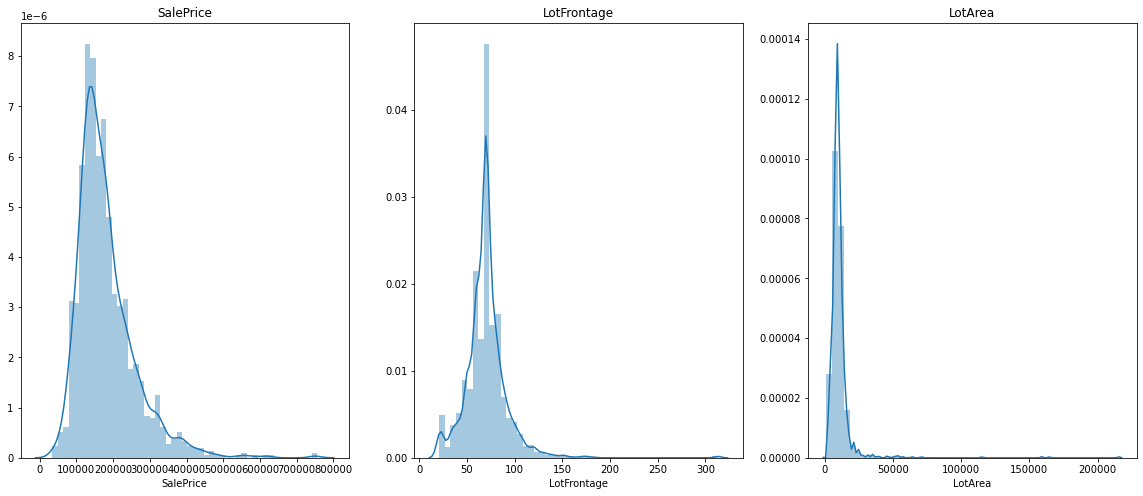

In [28]:
# Univariate and BIvariate Analysis
plt.figure(figsize=(20,8))
plt.subplot(1,3,1)
sns.distplot(data_df.SalePrice)
plt.title("SalePrice")
plt.subplot(1,3,2)
sns.distplot(data_df["LotFrontage"])
plt.title("LotFrontage")
plt.subplot(1,3,3)
sns.distplot(data_df["LotArea"])
plt.title("LotArea")
plt.show()


## Pre-Processing

### Dummy variable creation

In [29]:
#selecting all the object datatype features
cols = data_df.select_dtypes("object")

In [30]:
cols.columns

Index(['MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'BldgType',
       'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1',
       'HeatingQC', 'KitchenQual', 'GarageType', 'GarageFinish',
       'SaleCondition'],
      dtype='object')

In [31]:
dummy = pd.get_dummies(data_df[cols.columns], drop_first=True)

# Adding the dummy variables created above to the 'data_df' dataframe
data_df = pd.concat([data_df, dummy], axis=1)

In [32]:
#Dropping the original columns for which dummy variables are created
data_df = data_df.drop(cols.columns, axis=1)
data_df.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea  \
0         60         65.0     8450            7            5       196.0   
1         20         80.0     9600            6            8         0.0   
2         60         68.0    11250            7            5       162.0   
3         70         60.0     9550            7            5         0.0   
4         60         84.0    14260            8            5       350.0   

   BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  GrLivArea  \
0         706        150          856       856       854       1710   
1         978        284         1262      1262         0       1262   
2         486        434          920       920       866       1786   
3         216        540          756       961       756       1717   
4         655        490         1145      1145      1053       2198   

   BsmtFullBath  FullBath  HalfBath  BedroomAbvGr  TotRmsAbvGrd  Fireplaces  \
0             1         2         1             3             8           0   
1             0         2         0             3             6           1   
2             1         2         1             3             6           1   
3             1         1         0             3             7           1   
4             1         2         1             4             9           1   

   GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  SalePrice  YearBuilt_New  \
0           2         548           0           61     208500             18   
1           2         460         298            0     181500             45   
2           2         608           0           42     223500             20   
3           3         642           0           35     140000            106   
4           3         836         192           84     250000             21   

   YearRemodAdd_New  YrSold_New  GarageYrBlt_New  MSZoning_FV  MSZoning_RH  \
0                18          13               18            0            0   
1                45          14               45            0            0   
2                19          13               20            0            0   
3                51          15               23            0            0   
4                21          13               21            0            0   

   MSZoning_RL  MSZoning_RM  LotShape_IR2  LotShape_IR3  LotShape_Reg  \
0            1            0             0             0             1   
1            1            0             0             0             1   
2            1            0             0             0             0   
3            1            0             0             0             0   
4            1            0             0             0             0   

   LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  \
0                  0              0              0                 1   
1                  0              1              0                 0   
2                  0              0              0                 1   
3                  0              0              0                 0   
4                  0              1              0                 0   

   Neighborhood_Blueste  Neighborhood_BrDale  Neighborhood_BrkSide  \
0                     0                    0                     0   
1                     0                    0                     0   
2                     0                    0                     0   
3                     0                    0                     0   
4                     0                    0                     0   

   Neighborhood_ClearCr  Neighborhood_CollgCr  Neighborhood_Crawfor  \
0                     0                     1                     0   
1                     0                     0                     0   
2                     0                     1                     0   
3                     0                     0                     1   
4                     0                

In [33]:
data_df.shape

(1460, 153)

In [34]:
X = data_df.drop(['SalePrice'], axis=1)
y = data_df['SalePrice']

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=42)

In [36]:
X_train.shape

(1021, 152)

In [37]:
y_train.shape

(1021,)

In [38]:
X_train_lasso = X_train.copy(deep=True)
X_test_lasso = X_test.copy(deep=True)

In [39]:
#numeric_cols = ["LotArea","BsmtFinSF1","BsmtFinSF2","BsmtUnfSF","TotalBsmtSF","1stFlrSF",
#                "2ndFlrSF","GrLivArea","GarageArea","WoodDeckSF","OpenPorchSF","EnclosedPorch",
#                "YearBuilt_New","YearRemodAdd_New","GarageYrBlt_New","YrSold_New"]
numeric_data = X_train.select_dtypes(["int64","float"])

In [40]:
numeric_data.head()

LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea  BsmtFinSF1  \
135          80.0    10400            7            6       288.0           0   
1452         35.0     3675            5            5        80.0         547   
762          72.0     8640            7            5         0.0          24   
932          84.0    11670            9            5       302.0           0   
435          43.0    10667            7            6         0.0         385   

      BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  GrLivArea  BsmtFullBath  \
135        1304         1304      1682         0       1682             0   
1452          0          547      1072         0       1072             1   
762         732          756       764       783       1547             0   
932        1905         1905      1905         0       1905             0   
435          70          799       827       834       1661             1   

      FullBath  HalfBath  BedroomAbvGr  TotRmsAbvGrd  Fireplaces  GarageCars  \
135          2         0             3             7           1           2   
1452         1         0             2             5           0           2   
762          2         1             3             7           0           2   
932          2         0             3             8           1           3   
435          2         1             3             6           1           2   

      GarageArea  WoodDeckSF  OpenPorchSF  YearBuilt_New  YearRemodAdd_New  \
135          530          98            0             51                51   
1452         525           0           28             16                16   
762          614         169           45             12                12   
932          788           0          191             15                15   
435          550         158           61             25                25   

      YrSold_New  GarageYrBlt_New  
135           13               51  
1452          15               16  
762           11               12  
932           14               15  
435           12               25

In [41]:
#applying power transaformation to avod the skewness in the data and make the distributions of the features normal
pt = PowerTransformer()
transformed_data = pd.DataFrame(pt.fit_transform(numeric_data))
transformed_data.columns = numeric_data.columns
transformed_data.head()

LotFrontage   LotArea  OverallQual  OverallCond  MasVnrArea  BsmtFinSF1  \
0     0.522462  0.246234     0.646494     0.442901    1.259986   -1.359863   
1    -1.877784 -1.727007    -0.814785    -0.472496    0.967844    0.632332   
2     0.173696 -0.105318     0.646494    -0.472496   -0.855903   -0.696051   
3     0.688652  0.464669     2.038663    -0.472496    1.269491   -1.359863   
4    -1.348003  0.294295     0.646494     0.442901   -0.855903    0.429076   

   BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  GrLivArea  BsmtFullBath  \
0   1.392360     0.588660  1.299438 -0.883089   0.454042     -0.834872   
1  -2.078257    -1.165295 -0.109062 -0.883089  -0.903737      1.181680   
2   0.541738    -0.636387 -1.178499  1.137716   0.201993     -0.834872   
3   2.089738     1.774429  1.685947 -0.883089   0.828979     -0.834872   
4  -1.282730    -0.532918 -0.927528  1.150362   0.416197      1.181680   

   FullBath  HalfBath  BedroomAbvGr  TotRmsAbvGrd  Fireplaces  GarageCars  \
0  0.781243 -0.766544      0.145530      0.371652    0.787833    0.248837   
1 -1.072482 -0.766544     -1.100932     -0.963701   -1.018982    0.248837   
2  0.781243  1.299789      0.145530      0.371652   -1.018982    0.248837   
3  0.781243 -0.766544      0.145530      0.929139    0.787833    1.822162   
4  0.781243  1.299789      0.145530     -0.252772    0.787833    0.248837   

   GarageArea  WoodDeckSF  OpenPorchSF  YearBuilt_New  YearRemodAdd_New  \
0    0.286928    0.871272    -1.094213       0.281907          0.874876   
1    0.264252   -0.940260     0.428355      -1.310054         -1.095942   
2    0.663015    1.039686     0.650603      -1.645557         -1.619203   
3    1.417168   -0.940260     1.361053      -1.387335         -1.212388   
4    0.377293    1.019287     0.796233      -0.743450         -0.308435   

   YrSold_New  GarageYrBlt_New  
0   -0.157578         0.532775  
1    1.384119        -0.892529  
2   -1.623720        -1.122280  
3    0.604253        -0.947467  
4   -0.900546        -0.451261

In [42]:
transformed_data.describe(include="all")

LotFrontage       LotArea   OverallQual   OverallCond    MasVnrArea  \
count  1.021000e+03  1.021000e+03  1.021000e+03  1.021000e+03  1.021000e+03   
mean  -5.110723e-17  3.332844e-16 -6.622192e-16 -3.257814e-16  1.220049e-16   
std    1.000490e+00  1.000490e+00  1.000490e+00  1.000490e+00  1.000490e+00   
min   -3.025287e+00 -3.699791e+00 -4.099523e+00 -5.813033e+00 -8.559026e-01   
25%   -3.984091e-01 -3.542913e-01 -8.147855e-01 -4.724962e-01 -8.559026e-01   
50%    8.502995e-02  9.446912e-02 -7.411227e-02 -4.724962e-01 -8.559026e-01   
75%    4.801015e-01  4.695361e-01  6.464937e-01  4.429014e-01  1.148328e+00   
max    6.506763e+00  5.982176e+00  2.714234e+00  2.747103e+00  1.531199e+00   

         BsmtFinSF1     BsmtUnfSF   TotalBsmtSF      1stFlrSF      2ndFlrSF  \
count  1.021000e+03  1.021000e+03  1.021000e+03  1.021000e+03  1.021000e+03   
mean  -1.846385e-16  2.164989e-16 -2.209028e-16 -3.934931e-15  2.929423e-16   
std    1.000490e+00  1.000490e+00  1.000490e+00  1.000490e+00  1.000490e+00   
min   -1.359863e+00 -2.078257e+00 -3.154614e+00 -3.827727e+00 -8.830888e-01   
25%   -1.359863e+00 -6.271410e-01 -5.424765e-01 -6.989739e-01 -8.830888e-01   
50%    4.362499e-01  5.712727e-02 -8.153605e-02 -3.946295e-02 -8.830888e-01   
75%    8.070710e-01  6.714402e-01  5.552397e-01  7.096290e-01  1.124118e+00   
max    2.505894e+00  2.519462e+00  8.316285e+00  4.448502e+00  1.322329e+00   

          GrLivArea  BsmtFullBath      FullBath      HalfBath  BedroomAbvGr  \
count  1.021000e+03  1.021000e+03  1.021000e+03  1.021000e+03  1.021000e+03   
mean   1.032787e-15 -7.796571e-17  3.009890e-16 -9.416779e-17  2.187281e-16   
std    1.000490e+00  1.000490e+00  1.000490e+00  1.000490e+00  1.000490e+00   
min   -4.425730e+00 -8.348716e-01 -3.300577e+00 -7.665443e-01 -3.768278e+00   
25%   -7.129647e-01 -8.348716e-01 -1.072482e+00 -7.665443e-01 -1.100932e+00   
50%    5.838599e-02 -8.348716e-01  7.812429e-01 -7.665443e-01  1.455299e-01   
75%    6.498776e-01  1.181680e+00  7.812429e-01  1.299789e+00  1.455299e-01   
max    4.092262e+00  1.853838e+00  2.427235e+00  1.613320e+00  5.978297e+00   

       TotRmsAbvGrd    Fireplaces    GarageCars    GarageArea    WoodDeckSF  \
count  1.021000e+03  1.021000e+03  1.021000e+03  1.021000e+03  1.021000e+03   
mean  -1.035465e-15  2.259592e-16  3.886324e-16  5.567426e-17  2.487943e-16   
std    1.000490e+00  1.000490e+00  1.000490e+00  1.000490e+00  1.000490e+00   
min   -4.033158e+00 -1.018982e+00 -2.160500e+00 -2.567845e+00 -9.402604e-01   
25%   -9.637009e-01 -1.018982e+00 -1.098226e+00 -5.547369e-01 -9.402604e-01   
50%   -2.527722e-01  7.878330e-01  2.488369e-01  7.695520e-02 -9.402604e-01   
75%    3.716520e-01  7.878330e-01  2.488369e-01  4.939812e-01  1.043241e+00   
max    3.421513e+00  2.127221e+00  3.588452e+00  3.960681e+00  1.498044e+00   

        OpenPorchSF  YearBuilt_New  YearRemodAdd_New    YrSold_New  \
count  1.021000e+03   1.021000e+03      1.021000e+03  1.021000e+03   
mean   4.914993e-17   2.572760e-16      3.108842e-16  1.952949e-16   
std    1.000490e+00   1.000490e+00      1.000490e+00  1.000490e+00   
min   -1.094213e+00  -1.742483e+00     -1.779385e+00 -1.623720e+00   
25%   -1.094213e+00  -1.033821e+00     -9.871046e-01 -9.005463e-01   
50%    4.115896e-01   2.203181e-01     -1.760652e-01 -1.575785e-01   
75%    8.832418e-01   7.395592e-01      9.943750e-01  6.042526e-01   
max    1.904507e+00   2.126130e+00      1.390024e+00  1.384119e+00   

       GarageYrBlt_New  
count     1.021000e+03  
mean     -4.638797e-16  
std       1.000490e+00  
min      -2.211927e+00  
25%      -7.868255e-01  
50%       2.636776e-03  
75%       7.872193e-01  
max       2.394014e+00

## Model Building

In [43]:
# Using RFE and selecting top 30 features
lin_reg = LinearRegression()
model_rfe = RFE(lin_reg,30)

In [44]:
model_rfe = model_rfe.fit(X_train, y_train)

In [45]:
# looking at the features which have been selected by RFE

list(zip(X_train.columns, model_rfe.support_, model_rfe.ranking_))

[('MSSubClass', False, 110),
 ('LotFrontage', False, 102),
 ('LotArea', False, 122),
 ('OverallQual', False, 4),
 ('OverallCond', False, 60),
 ('MasVnrArea', False, 119),
 ('BsmtFinSF1', False, 118),
 ('BsmtUnfSF', False, 120),
 ('TotalBsmtSF', False, 117),
 ('1stFlrSF', False, 112),
 ('2ndFlrSF', False, 114),
 ('GrLivArea', False, 111),
 ('BsmtFullBath', False, 32),
 ('FullBath', True, 1),
 ('HalfBath', False, 43),
 ('BedroomAbvGr', False, 99),
 ('TotRmsAbvGrd', False, 52),
 ('Fireplaces', False, 21),
 ('GarageCars', False, 2),
 ('GarageArea', False, 121),
 ('WoodDeckSF', False, 116),
 ('OpenPorchSF', False, 113),
 ('YearBuilt_New', False, 108),
 ('YearRemodAdd_New', False, 105),
 ('YrSold_New', False, 92),
 ('GarageYrBlt_New', False, 107),
 ('MSZoning_FV', False, 9),
 ('MSZoning_RH', False, 73),
 ('MSZoning_RL', False, 74),
 ('MSZoning_RM', False, 68),
 ('LotShape_IR2', False, 27),
 ('LotShape_IR3', False, 22),
 ('LotShape_Reg', False, 109),
 ('LotConfig_CulDSac', False, 26),
 ('LotC

In [46]:
#Listing down columns selected by RFE
col = X_train.columns[model_rfe.support_]
col

Index(['FullBath', 'Neighborhood_ClearCr', 'Neighborhood_Crawfor',
       'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_StoneBr',
       'Neighborhood_Veenker', 'BldgType_Duplex', 'BldgType_Twnhs',
       'BldgType_TwnhsE', 'HouseStyle_2.5Fin', 'RoofStyle_Mansard',
       'RoofStyle_Shed', 'Exterior1st_CemntBd', 'Exterior2nd_AsphShn',
       'Exterior2nd_BrkFace', 'Exterior2nd_CmentBd', 'Exterior2nd_ImStucc',
       'BsmtQual_Fa', 'BsmtQual_Gd', 'BsmtQual_None', 'BsmtQual_TA',
       'BsmtExposure_Gd', 'BsmtExposure_None', 'BsmtFinType1_None',
       'HeatingQC_Po', 'KitchenQual_Fa', 'KitchenQual_Gd', 'KitchenQual_TA',
       'SaleCondition_Alloca'],
      dtype='object')

In [47]:
# Subsetting Train data with only the columns selected by RFE
X_train = X_train[col]
X_test = X_test[col]

In [48]:
#Fitting Linear Regression model with the features selected by RFE
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [49]:
# Print the coefficients and intercept
print(lin_reg.intercept_)
print(lin_reg.coef_)

236920.93712277847
[  39877.19628244   27666.33873207   46476.91623947  100005.85337011
   44145.34703884   78425.33332133   40548.82204729  -43258.73090169
  -49044.08252275  -42716.07685058   39958.99642396   37469.58972848
   60053.59957846   50232.83405819   15228.11149492   40120.89352631
  -39395.00448303   64187.53627542  -97044.03863304  -53348.31277806
  -35133.01839118  -71954.14565319   38554.70888461  -35133.01839118
  -35133.01839118  -35685.11057488 -103932.96324731  -57810.27994906
  -82158.87717716   50753.31203983]


In [50]:
y_pred_train = lin_reg.predict(X_train)
y_pred_test = lin_reg.predict(X_test)

linear_metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
linear_metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
linear_metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
linear_metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
linear_metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
linear_metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
linear_metric.append(mse_test_lr**0.5)

0.767897308992306
0.7341061166356763
1427647544543.8608
812679412476.5118
1398283589.1712642
1855432448.5765111


## Ridge Regression

In [51]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9, 2.0,2.1,2.2,2.3,2.4,2.5,2.6,2.7,2.8,2.9, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200,250,300,350,400,500,1000]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 320 out of 320 | elapsed:    6.7s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2,
                                   1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1,
                                   2.2, 2.3, 2.4, 2.5, 2.6, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [52]:
# Printing the best hyperparameter alpha
ridge_alpha = model_cv.best_params_["alpha"]
print(ridge_alpha)

2.1


In [53]:
#Fitting Ridge model for alpha and printing coefficients
ridge = Ridge(alpha=ridge_alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[ 40989.65724427  25554.48132382  43523.72697575  93331.93480852
  45557.11710568  72609.66191184  32566.3587895  -38869.94722036
 -46098.29864066 -40460.84434465  30386.26835395  22486.04465452
  28562.77048129  24957.24265756   5732.47559431  35719.31630424
 -12169.91234172  46811.88011294 -85686.70731659 -48689.1292227
 -32894.72340819 -66984.53644148  39582.54231261 -32894.72340819
 -32894.72340819 -11463.99577782 -93604.73462206 -52632.94218854
 -77590.9185391   32875.45970564]


In [54]:
# Calculate metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

ridge_alpha1 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
ridge_alpha1.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
ridge_alpha1.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
ridge_alpha1.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
ridge_alpha1.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
ridge_alpha1.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
ridge_alpha1.append(mse_test_lr**0.5)

0.7646668659978648
0.7421120523945999
1447517775211.0703
788210029854.528
1417745127.5328798
1799566278.2066848


## Lasso Regression

In [55]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 64 candidates, totalling 320 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 320 out of 320 | elapsed:    5.2s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2,
                                   1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1,
                                   2.2, 2.3, 2.4, 2.5, 2.6, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [56]:
# Printing the best hyperparametmodel_cv.best_params_["alpha"]er alpha
lasso_alpha = model_cv.best_params_["alpha"]
print(lasso_alpha)

120


In [57]:
#Fitting Ridge model for alpha = 100 and printing coefficients 
lasso = Lasso(alpha=lasso_alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=120)

In [58]:
lasso.coef_

array([  40425.83693788,   23299.01256721,   43205.65077055,
         96105.81035949,   43564.9723558 ,   73573.53062418,
         25922.11955265,  -35010.84057118,  -44405.72655879,
        -39679.70439037,   22464.5522805 ,    2866.93628266,
             0.        ,   10252.6794635 ,       0.        ,
         31746.97978243,       0.        ,   38954.97970392,
        -86150.44770013,  -47847.05426554,  -69261.02432748,
        -66119.48296146,   39603.99292568,  -25843.03675375,
            -0.        ,      -0.        , -100322.66713697,
        -56053.42595631,  -81517.40876375,   19103.22988578])

In [59]:
# calculate metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

lasso_alpha1 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
lasso_alpha1.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
lasso_alpha1.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
lasso_alpha1.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
lasso_alpha1.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
lasso_alpha1.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
lasso_alpha1.append(mse_test_lr**0.5)

0.761744105232108
0.7472476443696788
1465495473842.6794
772513580518.3557
1435353059.5912628
1763729635.8866568


## Looking at all the coefficients after regularization

In [60]:
#Creating a Dataframe to store the coefficients
betas = pd.DataFrame(index=X_train.columns)

In [61]:
betas.rows = X_train.columns

In [62]:
#Adding the coeffficients of different models to the dataframe
betas['Linear'] = lin_reg.coef_
betas['Ridge_abs'] = np.abs(ridge.coef_)
betas['Ridge'] = ridge.coef_
betas['Lasso_abs'] = np.abs(lasso.coef_)
betas['Lasso'] = lasso.coef_

In [63]:
#Sorting the data frame on Lasso coefficient absolute values
pd.set_option('display.max_rows', None)
betas.sort_values("Lasso_abs", ascending=False)

Linear     Ridge_abs         Ridge  \
KitchenQual_Fa       -103932.963247  93604.734622 -93604.734622   
Neighborhood_NoRidge  100005.853370  93331.934809  93331.934809   
BsmtQual_Fa           -97044.038633  85686.707317 -85686.707317   
KitchenQual_TA        -82158.877177  77590.918539 -77590.918539   
Neighborhood_StoneBr   78425.333321  72609.661912  72609.661912   
BsmtQual_None         -35133.018391  32894.723408 -32894.723408   
BsmtQual_TA           -71954.145653  66984.536441 -66984.536441   
KitchenQual_Gd        -57810.279949  52632.942189 -52632.942189   
BsmtQual_Gd           -53348.312778  48689.129223 -48689.129223   
BldgType_Twnhs        -49044.082523  46098.298641 -46098.298641   
Neighborhood_NridgHt   44145.347039  45557.117106  45557.117106   
Neighborhood_Crawfor   46476.916239  43523.726976  43523.726976   
FullBath               39877.196282  40989.657244  40989.657244   
BldgType_TwnhsE       -42716.076851  40460.844345 -40460.844345   
BsmtExposure_Gd        38554.708885  39582.542313  39582.542313   
Exterior2nd_ImStucc    64187.536275  46811.880113  46811.880113   
BldgType_Duplex       -43258.730902  38869.947220 -38869.947220   
Exterior2nd_BrkFace    40120.893526  35719.316304  35719.316304   
Neighborhood_Veenker   40548.822047  32566.358789  32566.358789   
BsmtExposure_None     -35133.018391  32894.723408 -32894.723408   
Neighborhood_ClearCr   27666.338732  25554.481324  25554.481324   
HouseStyle_2.5Fin      39958.996424  30386.268354  30386.268354   
SaleCondition_Alloca   50753.312040  32875.459706  32875.459706   
Exterior1st_CemntBd    50232.834058  24957.242658  24957.242658   
RoofStyle_Mansard      37469.589728  22486.044655  22486.044655   
Exterior2nd_CmentBd   -39395.004483  12169.912342 -12169.912342   
Exterior2nd_AsphShn    15228.111495   5732.475594   5732.475594   
RoofStyle_Shed         60053.599578  28562.770481  28562.770481   
BsmtFinType1_None     -35133.018391  32894.723408 -32894.723408   
HeatingQC_Po          -35685.110575  11463.995778 -11463.995778   

                          Lasso_abs          Lasso  
KitchenQual_Fa        100322.667137 -100322.667137  
Neighborhood_NoRidge   96105.810359   96105.810359  
BsmtQual_Fa            86150.447700  -86150.447700  
KitchenQual_TA         81517.408764  -81517.408764  
Neighborhood_StoneBr   73573.530624   73573.530624  
BsmtQual_None          69261.024327  -69261.024327  
BsmtQual_TA            66119.482961  -66119.482961  
KitchenQual_Gd         56053.425956  -56053.425956  
BsmtQual_Gd            47847.054266  -47847.054266  
BldgType_Twnhs         44405.726559  -44405.726559  
Neighborhood_NridgHt   43564.972356   43564.972356  
Neighborhood_Crawfor   43205.650771   43205.650771  
FullBath               40425.836938   40425.836938  
BldgType_TwnhsE        39679.704390  -39679.704390  
BsmtExposure_Gd        39603.992926   39603.992926  
Exterior2nd_ImStucc    38954.979704   38954.979704  
BldgType_Duplex        35010.840571  -35010.840571  
Exterior2nd_BrkFace    31746.979782   31746.979782  
Neighborhood_Veenker   25922.119553   25922.119553  
BsmtExposure_None      25843.036754  -25843.036754  
Neighborhood_ClearCr   23299.012567   23299.012567  
HouseStyle_2.5Fin      22464.552281   22464.552281  
SaleCondition_Alloca   19103.229886   19103.229886  
Exterior1st_CemntBd    10252.679463   10252.679463  
RoofStyle_Mansard       2866.936283    2866.936283  
Exterior2nd_CmentBd        0.000000       0.000000  
Exterior2nd_AsphShn        0.000000       0.000000  
RoofStyle_Shed             0.000000       0.000000  
BsmtFinType1_None          0.000000      -0.000000  
HeatingQC_Po               0.000000      -0.000000

## Feature Selection using Lasso

In [64]:
#alpha = lasso_alpha
#As we have already know the best alpha for lasso, using the same here
sfm_lasso = SelectFromModel(Lasso(alpha=lasso_alpha))
sfm_lasso.fit(X_train_lasso, y_train) 

SelectFromModel(estimator=Lasso(alpha=120))

In [65]:
sfm_lasso.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
       False, False,  True,  True,  True, False,  True,  True, False,
       False, False, False,  True, False, False,  True,  True,  True,
       False, False,  True,  True, False,  True,  True,  True,  True,
        True, False, False,  True,  True, False, False,  True,  True,
       False, False, False,  True, False, False,  True, False,  True,
        True, False, False, False, False, False, False,  True, False,
        True,  True, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False,  True, False,
       False,  True, False,  True, False,  True,  True, False,  True,
       False, False, False,  True,  True,  True, False, False, False,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,

In [66]:
selected_feat = X_train_lasso.columns[(sfm_lasso.get_support())]

In [67]:
print('total features: {}'.format((X_train_lasso.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(
      np.sum(sfm_lasso.estimator_.coef_ == 0)))


total features: 152
selected features: 85
features with coefficients shrank to zero: 66


- Lasso Regression shrank coeficients of 66 features to zero and selected 85 features out of 152.
- Buliding a model with 85 features will increase the model complexity
- We may have to select features further from the 85 either manually or a technique like RFE

## Code for Subjective questions

#### Question 1

Alpha for Ridge regression is 2.1 where as for Lasso regression it is 120

###### Fitting Ridge doubling the value i.e, 2.1 * 2 = 4.2

In [68]:
ridge = Ridge(alpha=ridge_alpha*2)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[ 41876.37580121  23162.18661159  40836.8953571   87379.81620559
  46214.45866808  66894.03024601  27336.60435693 -36372.1295366
 -43481.99688986 -38323.26118711  24475.04962594  15633.06820654
  18842.6167254   18866.51003483   3067.18725502  32190.09012239
  -4721.71018619  37285.76135697 -76959.94159606 -45231.56065863
 -31185.31700291 -63163.34490836  40121.91850423 -31185.31700291
 -31185.31700291  -6814.59604372 -84951.34565566 -48193.04482718
 -73721.47819641  24040.02705293]


In [69]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

ridge_alpha2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
ridge_alpha2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
ridge_alpha2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
ridge_alpha2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
ridge_alpha2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
ridge_alpha2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
ridge_alpha2.append(mse_test_lr**0.5)

0.7590812005843128
0.7431202231140593
1481874815526.629
785128651758.8774
1451395509.8204005
1792531168.3992636


###### Fitting Lasso doubling the value i.e, 120 * 2 = 240

In [70]:
lasso = Lasso(alpha=lasso_alpha*2)

lasso.fit(X_train, y_train)
print(lasso.coef_)

[ 41396.29992177  15857.31460667  40039.51338999  92255.65998968
  42255.3970033   66816.11873496  11158.24243879 -30837.0558521
 -39101.45792671 -35783.09844322   4729.57509724      0.
      0.           7441.6505834       0.          23646.22220872
      0.          13840.48042213 -77051.64972432 -43442.09234977
 -62546.33527636 -60793.48788391  40659.58870935 -23347.44621035
     -0.             -0.         -96522.23320819 -54769.88503073
 -81290.11195459      0.        ]


In [71]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

lasso_alpha2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
lasso_alpha2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
lasso_alpha2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
lasso_alpha2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
lasso_alpha2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
lasso_alpha2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
lasso_alpha2.append(mse_test_lr**0.5)

0.7525311643504384
0.7523657813744151
1522163633830.9985
756870480641.9878
1490855664.8687546
1728014795.9862735


In [72]:
betas = pd.DataFrame(index=X_train.columns)
betas.rows = X_train.columns

In [73]:
betas['Linear'] = lin_reg.coef_
betas['Ridge_abs'] = np.abs(ridge.coef_)
betas['Ridge'] = ridge.coef_
betas['Lasso_abs'] = np.abs(lasso.coef_)
betas['Lasso'] = lasso.coef_

In [74]:
pd.set_option('display.max_rows', None)
betas.sort_values("Lasso_abs", ascending=False)

Linear     Ridge_abs         Ridge     Lasso_abs  \
KitchenQual_Fa       -103932.963247  84951.345656 -84951.345656  96522.233208   
Neighborhood_NoRidge  100005.853370  87379.816206  87379.816206  92255.659990   
KitchenQual_TA        -82158.877177  73721.478196 -73721.478196  81290.111955   
BsmtQual_Fa           -97044.038633  76959.941596 -76959.941596  77051.649724   
Neighborhood_StoneBr   78425.333321  66894.030246  66894.030246  66816.118735   
BsmtQual_None         -35133.018391  31185.317003 -31185.317003  62546.335276   
BsmtQual_TA           -71954.145653  63163.344908 -63163.344908  60793.487884   
KitchenQual_Gd        -57810.279949  48193.044827 -48193.044827  54769.885031   
BsmtQual_Gd           -53348.312778  45231.560659 -45231.560659  43442.092350   
Neighborhood_NridgHt   44145.347039  46214.458668  46214.458668  42255.397003   
FullBath               39877.196282  41876.375801  41876.375801  41396.299922   
BsmtExposure_Gd        38554.708885  40121.918504  40121.918504  40659.588709   
Neighborhood_Crawfor   46476.916239  40836.895357  40836.895357  40039.513390   
BldgType_Twnhs        -49044.082523  43481.996890 -43481.996890  39101.457927   
BldgType_TwnhsE       -42716.076851  38323.261187 -38323.261187  35783.098443   
BldgType_Duplex       -43258.730902  36372.129537 -36372.129537  30837.055852   
Exterior2nd_BrkFace    40120.893526  32190.090122  32190.090122  23646.222209   
BsmtExposure_None     -35133.018391  31185.317003 -31185.317003  23347.446210   
Neighborhood_ClearCr   27666.338732  23162.186612  23162.186612  15857.314607   
Exterior2nd_ImStucc    64187.536275  37285.761357  37285.761357  13840.480422   
Neighborhood_Veenker   40548.822047  27336.604357  27336.604357  11158.242439   
Exterior1st_CemntBd    50232.834058  18866.510035  18866.510035   7441.650583   
HouseStyle_2.5Fin      39958.996424  24475.049626  24475.049626   4729.575097   
Exterior2nd_CmentBd   -39395.004483   4721.710186  -4721.710186      0.000000   
Exterior2nd_AsphShn    15228.111495   3067.187255   3067.187255      0.000000   
RoofStyle_Shed         60053.599578  18842.616725  18842.616725      0.000000   
BsmtFinType1_None     -35133.018391  31185.317003 -31185.317003      0.000000   
HeatingQC_Po          -35685.110575   6814.596044  -6814.596044      0.000000   
RoofStyle_Mansard      37469.589728  15633.068207  15633.068207      0.000000   
SaleCondition_Alloca   50753.312040  24040.027053  24040.027053      0.000000   

                             Lasso  
KitchenQual_Fa       -96522.233208  
Neighborhood_NoRidge  92255.659990  
KitchenQual_TA       -81290.111955  
BsmtQual_Fa          -77051.649724  
Neighborhood_StoneBr  66816.118735  
BsmtQual_None        -62546.335276  
BsmtQual_TA          -60793.487884  
KitchenQual_Gd       -54769.885031  
BsmtQual_Gd          -43442.092350  
Neighborhood_NridgHt  42255.397003  
FullBath              41396.299922  
BsmtExposure_Gd       40659.588709  
Neighborhood_Crawfor  40039.513390  
BldgType_Twnhs       -39101.457927  
BldgType_TwnhsE      -35783.098443  
BldgType_Duplex      -30837.055852  
Exterior2nd_BrkFace   23646.222209  
BsmtExposure_None    -23347.446210  
Neighborhood_ClearCr  15857.314607  
Exterior2nd_ImStucc   13840.480422  
Neighborhood_Veenker  11158.242439  
Exterior1st_CemntBd    7441.650583  
HouseStyle_2.5Fin      4729.575097  
Exterior2nd_CmentBd       0.000000  
Exterior2nd_AsphShn       0.000000  
RoofStyle_Shed            0.000000  
BsmtFinType1_None        -0.000000  
HeatingQC_Po             -0.000000  
RoofStyle_Mansard         0.000000  
SaleCondition_Alloca      0.000000

In [75]:
#Creating a dataframe to store the metrics
metric_df = pd.DataFrame([linear_metric, ridge_alpha1, ridge_alpha2, lasso_alpha1, lasso_alpha2])

In [76]:
#Adding the columns and index for the metrics dataframe
metric_df.columns = ["r2_score_train", "r2_score_test","RSS_train", "RSS_test","MSE_train","MSE_test"]
metric_df.index = ["Linear_regression", "Ridge_alpha1","Ridge_alpha2","Lasso_alpha1","Lasso_alpha2"]

In [77]:
metric_df

r2_score_train  r2_score_test     RSS_train      RSS_test  \
Linear_regression        0.767897       0.734106  1.427648e+12  8.126794e+11   
Ridge_alpha1             0.764667       0.742112  1.447518e+12  7.882100e+11   
Ridge_alpha2             0.759081       0.743120  1.481875e+12  7.851287e+11   
Lasso_alpha1             0.761744       0.747248  1.465495e+12  7.725136e+11   
Lasso_alpha2             0.752531       0.752366  1.522164e+12  7.568705e+11   

                      MSE_train      MSE_test  
Linear_regression  37393.630329  43074.730975  
Ridge_alpha1       37652.956425  42421.295103  
Ridge_alpha2       38097.185064  42338.294349  
Lasso_alpha1       37886.053629  41996.781256  
Lasso_alpha2       38611.600133  41569.397349